<a href="https://colab.research.google.com/github/semthedev/ml-course-2025/blob/main/seminars/02_scipy_clean_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install jupyter_black

In [ ]:
%load_ext jupyter_black

The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black


# SciPy - Scientific Python

https://www.scipy.org/

SciPy предназначена для выполнения научных и инженерных расчётов.

Согласно wiki, основные модули:


| подмодуль     | функциональность                                                 |
|---------------|------------------------------------------------------------------|
|.cluster       | Кластеризация                                                    |
|.constants     | Некоторые популярные математические и физические константы       |
|.datasets      | Маленькие датасеты для демонстраций                              |
|.fft           | Дискретное преобразование фурье и ко                             |
|.integrate     | Численное нахождение значения интегралов, решение диффуров       |
|.interpolate   | ИНтерполяция многочленов, сплайны                                |
| scipy.io      | Ввод-вывод данных, в том числе в проприетарных форматах          |
|.linalg        | Линейная алгебра: решение слу, декомпозиции, ...                 |
|.ndimage       | Image Signal Processing & Analysis                               |
|.odr           | Метод для error-in-variables моделей                             |
|.optimize      | Всевозможные оптимизаторы                                        |
|.signal        | Свертки, B-сплайны, фильтры, спектральный анализ; то что не вошло в ndimage |
|.sparse        | Разреженные матрицы                                              |
|.spatial       | Алгоритмы в метрчиеских пространствах                            |
|.special       | Всевозможные особые функции: гаммы, беты, ...      |
|.stats         | Распределения, статистики, статистические тесты, ...             |

In [ ]:
import sys
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

sp.__version__

'1.16.2'

### scipy.special

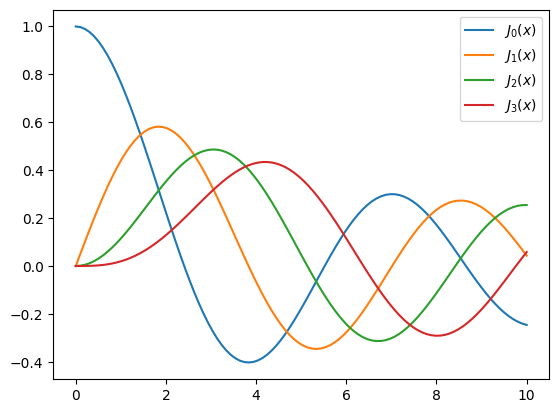

In [ ]:
from scipy.special import jn, yn, jn_zeros, yn_zeros

n = 0
x = 0.0
x = np.linspace(0, 10, 100)

fig, ax = plt.subplots()
for n in range(4):
    ax.plot(x, jn(n, x), label=r"$J_%d(x)$" % n)
ax.legend();

### scipy.integration

In [ ]:
from scipy.integrate import quad

a = 3
b = 7

quad(lambda x: np.cos(2 * x) * x**2 / (np.sin(1 / x) - x) + np.cos(x) ** 2, a, b)

(-1.5110108361411063, 1.324387719599961e-13)

In [ ]:
b**3 / 3 - a**3 / 3

105.33333333333333

### scipy.linalg

In [ ]:
from scipy.linalg import solve, inv, det

In [ ]:
A = np.array([[2, 2, 3], [4, 6, 6], [7, 8, 10]])
b = np.array([10, 11, 12])

# решение СЛУ
x = solve(A, b)

((A @ x - b) ** 2).sum()

np.float64(2.473867798773093e-27)

In [ ]:
inv(A) @ A

array([[1.00000000e+00, 0.00000000e+00, 2.66453526e-15],
       [0.00000000e+00, 1.00000000e+00, 2.22044605e-16],
       [2.22044605e-15, 1.77635684e-15, 1.00000000e+00]])

In [ ]:
A

array([[ 2,  2,  3],
       [ 4,  6,  6],
       [ 7,  8, 10]])

In [ ]:
120 + 2 * 6 * 7 + 3 * 4 * 8 - 3 * 6 * 7 - 2 * 4 * 10 - 2 * 6 * 8

-2

In [ ]:
print(det(A))

# посчитает определитель матрицы 3 на 3? :)
d = -2
d - det(A)

-2.0000000000000036


np.float64(3.552713678800501e-15)

#### scipy.sparse: разреженные матрицы

Документация: https://docs.scipy.org/doc/scipy/reference/sparse.html

Cейчас этот раздел переезжает с собственного формата matrix в numpy-совместимый array, будьте внимательны

### Описание видов матриц (на самом деле любой-в-любой переводится за линейное время):


**coo_matrix**

Данные хранятся в **COO**rdinate format, то есть как тройки (x, y, value). Не поддерживаются арифметические операции и выделение подматриц, колонок и строк. **Если встречаются тройки с одинаковыми координатами, значения суммируются.**

Хорош для построения матриц или как промежуточный формат между другими способами представления разреженных матриц (csc, csr).

---
**csc_matrix**


Элементы хранятся по колонкам. Следовательно, главная фишка -- эффективное выделение колонок (слайсинг).

Кроме того, эффективными будут операции CSC + CSC, CSC * CSC, etc. и умножение на строку.

Взамен, дороги слайсы по строкам и модификация нулевых элементов.

---
**csr_matrix**

Элементы хранятся по строкам. Следовательно, главная фишка -- их эффективное выделение (слайсинг).

Кроме того, эффективно реализованы операции CSR + CSR, CSR * CSR и т. д. Быстрое умножение на столбец.

Дороги выделение столбцов и модификация нулевых элементов.

---
**bsr_matrix**

Этот класс подойдёт для разреженных матриц, в которых ненулевые элементы встречаются плотными блоками, например матрицы в жордановой форме.  Можно указать высоту и ширину блоков; по умолчанию эти параметры подбираются эвристически. В остальном устроен как CSR.

---

**dia_matrix**

Диагонали хранятся как строки матрицы, которую подаём конструктору. Также подаётся массив со "сдвигами" от главной диагонали.

Хорош для хранения матриц, у которых много пустых диагоналей **(?)**.
```python
>>> data = np.array([[1, 2, 3, 4]]).repeat(3, axis=0)

>>> offsets = np.array([0, -1, 2])

>>> dia_matrix((data, offsets), shape=(4, 4)).toarray()
array([[1, 0, 3, 0],
       [1, 2, 0, 4],
       [0, 2, 3, 0],
       [0, 0, 3, 4]])
```
---
**dok_matrix**

Словарь, в котором ключ -- пара координат. Быстрый доступ до элементов, быстрое преобразование в COO (скан по всем ключам). Дубликатов не бывает.

Всё остальное -- медленное.

---
**lil_matrix**

Цепной список цепных списков, представляющих строки матрицы. Эффективный слайсинг строк, эффективное добавление новых элементов (=модификация нулевых значений).

Арифметика -- медленная, умножение на вектор -- медленное, слайсинг колонок -- медленный.

Хорош для построения. Если матрица ну совсем большая, то лучше использовать COO.

# Ещё

Работают многие методы, уже знакомые нам по занятию и домашке по NumPy.
Например, hstack, vstack, ...

Возможно, этот модуль вам пригодится в домашней работе.

In [ ]:
from scipy.sparse import csr_matrix, csc_matrix, coo_matrix

In [ ]:
M = sp.sparse.random(10000, 10000, density=0.01, format="coo", dtype=float)

In [ ]:
print("The size of M is", M.data.nbytes // 1024, "Kb")

The size of M is 7812 Kb


In [ ]:
# а numpy array такого размера бы сколько весил?
arr = np.random.random((10000, 10000))
print(arr)
print("The size of arr is", arr.nbytes // 1024, "Kb")

[[0.3911787  0.61472403 0.96187189 ... 0.93917555 0.56043819 0.1215416 ]
 [0.8899666  0.99828146 0.80212291 ... 0.02255256 0.13201607 0.9984758 ]
 [0.28905451 0.58842201 0.6316388  ... 0.23473607 0.41102713 0.24250283]
 ...
 [0.57348938 0.91168501 0.88850353 ... 0.6140582  0.66033493 0.09641053]
 [0.69661737 0.54479979 0.55875342 ... 0.3956593  0.79136142 0.71676182]
 [0.2067062  0.43474457 0.99729785 ... 0.56193653 0.22218823 0.03168034]]
The size of arr is 781250 Kb


In [ ]:
csc_M = csc_matrix(M)
csc_M

<Compressed Sparse Column sparse matrix of dtype 'float64'
	with 1000000 stored elements and shape (10000, 10000)>

In [ ]:
type(csc_M), type(csc_M.T)

(scipy.sparse._csc.csc_matrix, scipy.sparse._csr.csr_matrix)

А что будет, если транспонировать?

In [ ]:
%timeit coo_M = coo_matrix(M)

778 µs ± 67.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
coo_M = coo_matrix(M)
%timeit coo_M.T
%timeit csc_M.T

807 µs ± 64.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
18.7 µs ± 908 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
csc_Mt = csc_matrix(M.T)
csc_Mt

<Compressed Sparse Column sparse matrix of dtype 'float64'
	with 1000000 stored elements and shape (10000, 10000)>

In [ ]:
csr_M = csr_matrix(csc_M)
csr_M

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1000000 stored elements and shape (10000, 10000)>

In [ ]:
%timeit csr_M.dot(csc_Mt)

2.04 s ± 142 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit M.dot(csc_Mt)

2.07 s ± 134 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**Почему?**

В исходном коде, когда мы умножаем на разреженную матрицу, вызывается вот такой код:

```python
def _matmul_sparse(self, other):
    return self.tocsr()._matmul_sparse(other)
```


In [ ]:
from numpy.random import randint

print("Extracting columns:")
%timeit x = [csc_M[:, i] for i in randint(0, csc_M.shape[0], 100)]
%timeit x = [csr_M[:, i] for i in randint(0, csc_M.shape[0], 100)] # longer?

print("\nExtracting rows:")
%timeit x = [csc_M[i, :] for i in randint(0, csc_M.shape[0], 100)] # longer?
%timeit x = [csr_M[i, :] for i in randint(0, csc_M.shape[0], 100)]

Extracting columns:
4.79 ms ± 77.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
205 ms ± 4.47 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Extracting rows:
208 ms ± 5.04 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.83 ms ± 1.22 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


### scipy.optimize

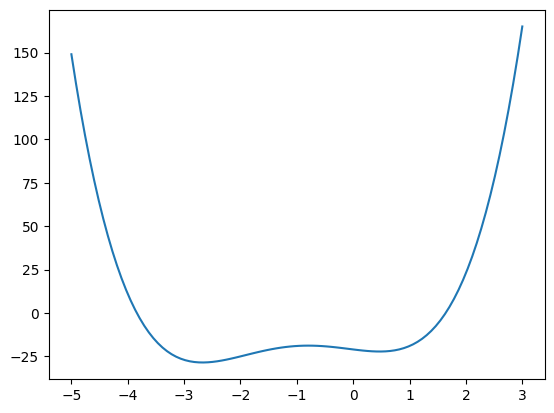

In [ ]:
def f(x):
    return 4 * x**3 + (x - 2) ** 2 + x**4 - 25


fig, ax = plt.subplots()
x = np.linspace(-5, 3, 100)
ax.plot(x, f(x))
plt.show()

In [ ]:
x_min = sp.optimize.fmin_bfgs(f, -2)
x_min

Optimization terminated successfully.
         Current function value: -28.506641
         Iterations: 5
         Function evaluations: 16
         Gradient evaluations: 8


array([-2.67298154])

In [ ]:
x_min = sp.optimize.fmin_bfgs(f, 2)
x_min

Optimization terminated successfully.
         Current function value: -22.195012
         Iterations: 7
         Function evaluations: 16
         Gradient evaluations: 8


array([0.46961766])

In [ ]:
x_min = sp.optimize.fmin_bfgs(f, 3)
x_min

Optimization terminated successfully.
         Current function value: -22.195012
         Iterations: 9
         Function evaluations: 20
         Gradient evaluations: 10


array([0.46961746])

In [ ]:
root = sp.optimize.root(f, -100)  # -100, -3, 100
root

 message: The solution converged.
 success: True
  status: 1
     fun: [ 0.000e+00]
       x: [-3.839e+00]
  method: hybr
    nfev: 29
    fjac: [[-1.000e+00]]
       r: [ 6.116e+01]
     qtf: [-1.882e-10]

### scipy.stats

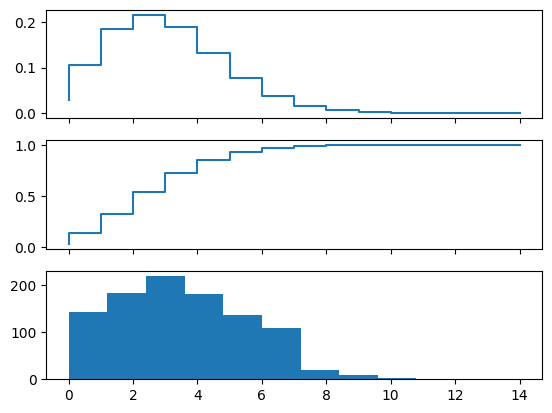

In [ ]:
X = sp.stats.poisson(3.5)
n = np.arange(0, 15)

fig, axes = plt.subplots(3, 1, sharex=True)
# plot the probability mass function (PMF)
axes[0].step(n, X.pmf(n))
# plot the cumulative distribution function (CDF)
axes[1].step(n, X.cdf(n))
# plot histogram of 1000 random realizations of the stochastic variable X
axes[2].hist(X.rvs(size=1000));

In [ ]:
# std, var - в чем разница?
X.mean(), X.std(), X.var()  # Poisson distribution

(np.float64(3.5), np.float64(1.8708286933869707), np.float64(3.5))

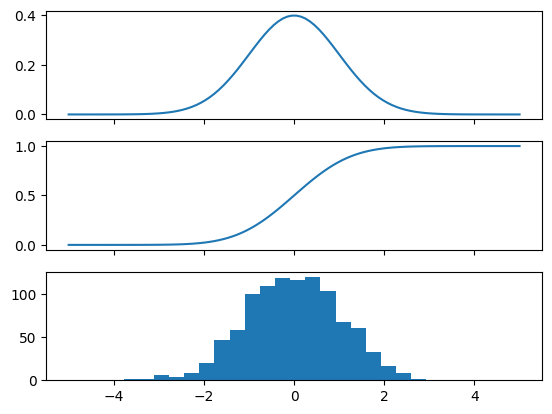

In [ ]:
# create a (continuous) random variable with normal distribution
Y = sp.stats.norm()
x = np.linspace(-5, 5, 100)
fig, axes = plt.subplots(3, 1, sharex=True)

# plot the probability distribution function (PDF)
axes[0].plot(x, Y.pdf(x))
# plot the cumulative distribution function (CDF)
axes[1].plot(x, Y.cdf(x))
# plot histogram of 1000 random realizations of the stochastic variable Y
axes[2].hist(Y.rvs(size=1000), bins=20);

In [ ]:
Y.mean(), Y.std(), Y.var()  # normal distribution

(np.float64(0.0), np.float64(1.0), np.float64(1.0))

На занятиях мы с вами не раз будем вручную (без использования готовых библиотек) реализовывать разные модели машинного обучения. ОЧЕНЬ частая ситация - надо узнать плотность многомерного нормального распроеделения в точке. Кстати чем такое распределение параметризуется? Чему она равна его плотность?

In [ ]:
mu = np.array([1, 2, 3])
x = np.array([2, 3, 4])
Sigma = np.array(np.eye(3) + np.random.rand(3, 3) * 0.01)

In [ ]:
Z = sp.stats.multivariate_normal(mu, Sigma)
Z.pdf(x)

np.float64(0.014347794705264205)

In [ ]:
# формулу плотности нормального распределения тоже надо помнить
pdf = ...

---
###  Брахистохрона
Задача о нахождении кривой наискорейшего спуска, или *брахистохроны*, состоит в том, чтобы найти такую форму горки, чтобы время скатывания  по ней тела без трения было минимальным.

![SegmentLocal](https://upload.wikimedia.org/wikipedia/commons/6/63/Brachistochrone.gif)

Известно, что решение этой задачи - трансцедентная кривая, называемая [циклоидой](https://ru.wikipedia.org/wiki/%D0%A6%D0%B8%D0%BA%D0%BB%D0%BE%D0%B8%D0%B4%D0%B0). Кроме того, что это кривая минимизирует время спуска, она является траекторией точки на границе катящейся окружности, время спуска по этой кривой не зависит от начального положения, а еще маятник в часах имеет циклоидальный ограничитель, благодаря чему частота его колебаний не зависит от амплитуды.

Она была поставлена Иоганном Бернулли в 1696 году. Разные решения предлагали Исаак Ньютон, Якоб Бернулли, Г. В. Лейбниц, Г. Ф. Лопиталь, Э. В. Чирнхаус. Скорее всего, вы уже находили ее на курсе по вариационному исчислению, минимизируя значение какого-то там интеграла. Здесь же предлагается приблизить брахстохрону при помощи функционала scipy.optimize.

Самый простой способ построить брахистохрону - параметризовать ее (вывод формул из закона сохранения энергии можно найти [тут](https://en.wikipedia.org/wiki/Brachistochrone_curve#Indirect_method)
$$x = r \theta - r\sin \theta $$
$$y = r - r\cos  \theta$$

Т.е. мы хотим найти такие $\theta$ и $r$, что соответсвущая дуга циклоиды соединяет концы нашей горки.

**Как будем решать такую задачу?**

4.0954290318848425
5.7014050746408875
theta* = 4.0954290318848425 r = 5.7014050746408875
T_cycloid = 3.1221649927541484 сек


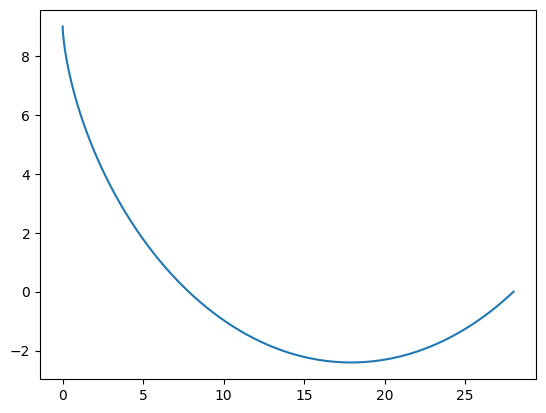

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

HEIGHT = 9
WIDTH = 28

# отрисуем правильный ответ:
fig = plt.figure()
ax = fig.add_subplot(111)

# Находим \theta и r
# Находим θ* из HEIGHT * (θ - sin θ)/(1 - cos θ) = WIDTH
f = lambda th: HEIGHT * (th - np.sin(th)) / (1 - np.cos(th)) - WIDTH
theta_star = optimize.brentq(f, 1e-6, 2*np.pi - 1e-6)  # корень на (0, 2π)
r = HEIGHT / (1 - np.cos(theta_star))                   # радиус циклоиды

# Сетка по параметру θ (только для красивого графика)
ts = np.linspace(0, theta_star, 400)
print(theta_star)
print(r)
g = 9.81
print("theta* =", theta_star, "r =", r)
print("T_cycloid =", np.sqrt(r/g)*theta_star, "сек")



sol_xs = r * (ts - np.sin(ts))
sol_ys = HEIGHT - r * (1 - np.cos(ts))


ax.plot(sol_xs, sol_ys)
fig.canvas.draw()
plt.show(block=False)

### Задача 3: Брахистохрона (1 балл)

В классе мы находили брахистохрону через параметризацию соответсвубщей дуги циклоиды. Ключевым здесь было то, что мы заранее знали, в каком виде искать ответ, что, к сожалению, далеко не всегда случается в реальной жизни. В этой задаче вам нужно будет построить кусочно-динейное приближение брахистохроны, не пользуясь явными формулами для ее формы. Другими словами, напишите функционал, который под данным высотам точек вычисляет время спуска, -- и минимизируйте этот функционал средствами scipy.

In [ ]:
# NB. Паметры горки и правильный ответ находятся выше - вы можете поменять их на свое усмотрение.
NUM_POINTS = 120
dx = WIDTH / (NUM_POINTS - 1)
xs = np.linspace(0, WIDTH, NUM_POINTS)

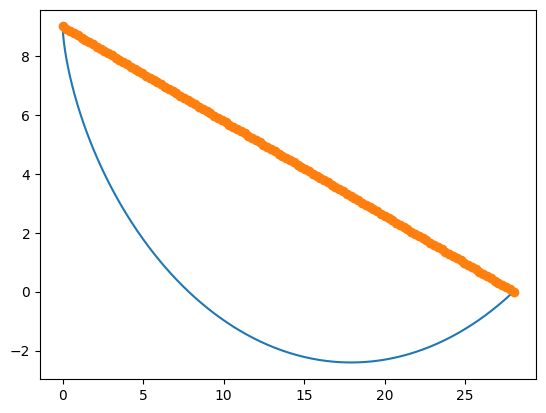

In [ ]:
def draw(ys):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(sol_xs, sol_ys)
    (li,) = ax.plot(xs, ys, marker="o")


# инициализируем горку прямой
ys = np.linspace(HEIGHT, 0, NUM_POINTS)
draw(ys)

In [ ]:
g = 9.81

def get_time(ys):
    """
    :param ys: heigths of our points
    :return: total time
    """
    y0 = ys[0]
    dy = np.diff(ys)           # (N-1,)
    m  = dy / dx               # наклоны сегментов
    A  = y0 - ys[:-1]          # запас "падения" к началу сегмента
    B  = y0 - ys[1:]           # к концу сегмента

    # подкоренные выражения обязаны быть ≥ 0
    if np.any(B < 0) or np.any(ys > y0):
        return 1e12

    s1p2 = np.sqrt(1 + m*m)
    core = np.where(
        np.abs(m) > 1e-12,
        (2.0/m) * (np.sqrt(A) - np.sqrt(B)),   # общий случай
        dx / np.sqrt(np.clip(A, 1e-12, None))  # предел при m≈0
    )
    return np.sum(s1p2 * core) / np.sqrt(2*g)


get_time(ys)

np.float64(4.911192823083105)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.1247421906861597
            Iterations: 209
            Function evaluations: 24883
            Gradient evaluations: 209


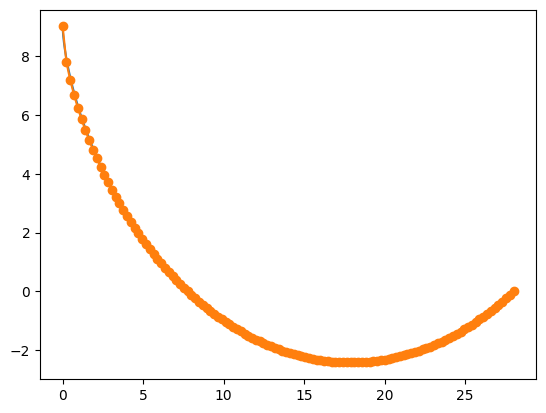

In [ ]:
# Bounds: we can not move the first and the last points
bounds = (
    [(HEIGHT, HEIGHT)]
    + [(-float("inf"), float("inf")) for _ in range(NUM_POINTS - 2)]
    + [(0, 0)]
)

# Run the optimization
...
from scipy.optimize import minimize

# obj = lambda y: get_time(y, xs)
# result = minimize(obj, ys, method="SLSQP", bounds=bounds, constraints=cons)


result = minimize(get_time, ys, method="SLSQP", bounds=bounds,
                  options={"maxiter": 2000, "ftol": 1e-12, "disp": True})
draw(result.x)

In [ ]:
get_time(ys), get_time(result.x)

(np.float64(4.426569559542253), np.float64(3.1247421906861597))